In [27]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img src="https://raw.githubusercontent.com/codebasics/py/master/ML/17_knn_classification/iris_petal_sepal.png" alt="Description of Image" width="200" height="200">


In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<img src="C:/Users/power/Pictures/iris%20flower%20type.svg" alt="Description of Image" width="500" height="300">

In [29]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower'] = df['target'].apply(lambda x: iris.target_names[x])
df[48:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [36]:
df.shape

(150, 6)

**Above says row as 150 which mean 3 flower has 50 rows**

In [41]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [42]:
import matplotlib.pyplot as plt

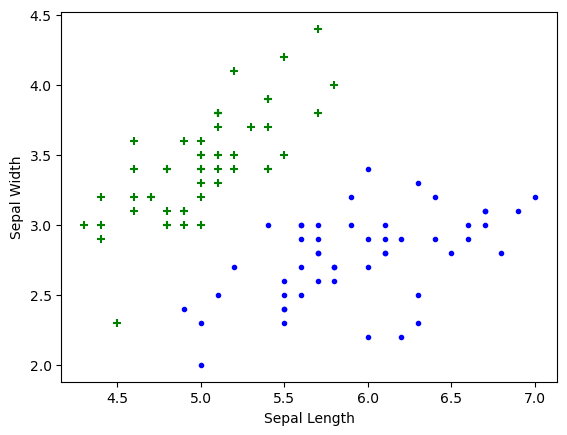

In [43]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

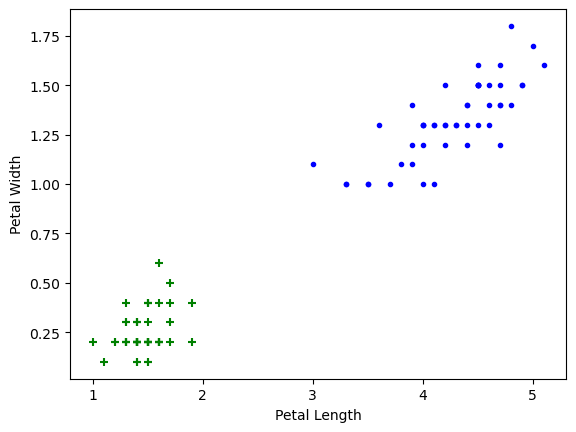

In [44]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [48]:
from sklearn.model_selection import train_test_split

x = df.drop(['target', 'flower'], axis='columns')
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
len(x_train)

120

In [50]:
len(x_test)

30

### <span style=color:red> Create KNN (K Neighrest Neighbour Classifier)</span>

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.score(x_test, y_test)

0.9666666666666667

In [60]:
knn.predict([[5.5, 4.3, 2.3, 3.2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

**<span style=color:green>Plot Confusion Matrix**

In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
y_predicted = knn.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

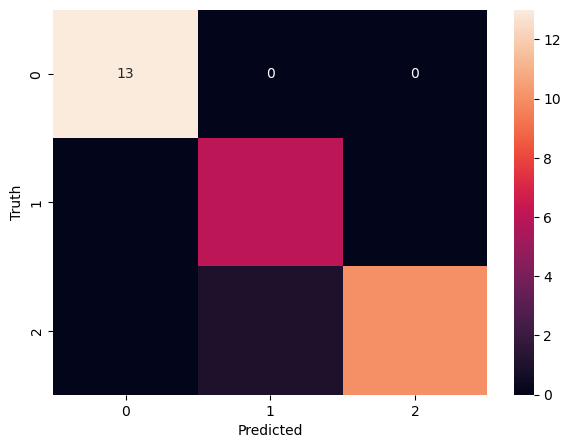

In [71]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(7, 5))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

